### CLASS: CSE7345
### NAME: Hanspal, Randeep
### SMUID: 47812509
### QUEST: Part A. Beautiful Soup

In [22]:
import bs4
from bs4 import BeautifulSoup
import requests

In [23]:
#get back a response OBJECT
response = requests.get("https://www.nasdaq.com/quotes/stock-quotes.aspx")

#the text is available as resonse.content
soup = BeautifulSoup(response.content, "html.parser")

#select the table we are looking for
tableNode = soup.find('div', {'class':'genTable marginL15px'})

childList = tableNode.find_all('tbody')
print (len(childList) )  

/usr/local/es6/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


5


In [24]:
#Create list to store percent change for each company
changeList=[]
colorList=[]
noList=[]
for child in childList:
    tdlist = child.find_all('span')
    no = (tdlist[0].getText()[6:11].strip())
    noList.append(no)
    color=tdlist[0]['class']
    colorList.append(color)
for i in range(len(colorList)):
    if 'green' in colorList[i]:
        changeList.append(noList[i])   
    else:
        changeList.append('-'+noList[i])

changeList = [ float(i) for i in changeList]
print(changeList)

[0.47, -0.39, -0.81, -0.05, -1.1]


In [25]:
import re
symbolList = []
volumeList = []
for child in childList:
    tdlist = child.find_all('td')  
    if (len(tdlist) > 0): 
        symbol = tdlist[0].getText().strip('\n')
        sale = tdlist[1].getText().strip('\n')
        volume = tdlist[3].getText().strip('\n')
        volume = re.sub('[,]','',volume)
        volumeList.append(volume.strip())
        symbolList.append(symbol)
print(symbolList)
print(volumeList)

[u'Micron Technology, Inc.', u'Invesco QQQ Trust, Series 1\nInvesco QQQ Trust, Series 1', u'Apple Inc.', u'Marvell Technology Group Ltd.', u'JD.com, Inc.']
[u'45632121', u'40453097', u'35791794', u'35454503', u'24782813']


In [26]:
# split to give a list and then grab first word using list comprehension
symbolList = [str.split()[0] for str in symbolList]
print (symbolList)

# Convert the string to int for our plots using list comprehension
volumeList = [ int(i) for i in volumeList]
print(volumeList)

[u'Micron', u'Invesco', u'Apple', u'Marvell', u'JD.com,']
[45632121, 40453097, 35791794, 35454503, 24782813]


In [27]:
#We are good to go to plot land
import matplotlib.pyplot as plt
#using datetime to print the curent date
import datetime
import numpy as np
%matplotlib inline

x = symbolList
yval  = volumeList

#for pyplot: create a list of integers based on the size of our itemList
x_pos = [i for i, _ in enumerate(x)]
print (x_pos)

[0, 1, 2, 3, 4]


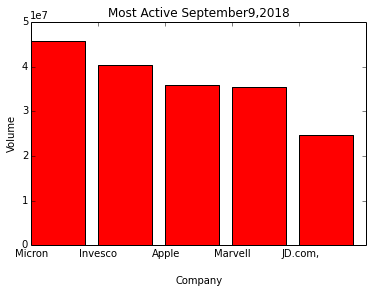

In [28]:
#plot most active stocks for the day
plt.bar(x_pos, yval, color='red')
plt.xticks(x_pos, x)
now = datetime.datetime.now()
dateFormat=("Most Active {0}{1},{2}".format(now.strftime("%B"),now.day,now.year))
plt.xlabel("\nCompany")
plt.ylabel("Volume")
plt.title(dateFormat)
plt.show()

In [29]:
#plot for x-axis
x = symbolList
print(x)

#plot for y-axis
yval  = changeList
print(yval)

[u'Micron', u'Invesco', u'Apple', u'Marvell', u'JD.com,']
[0.47, -0.39, -0.81, -0.05, -1.1]


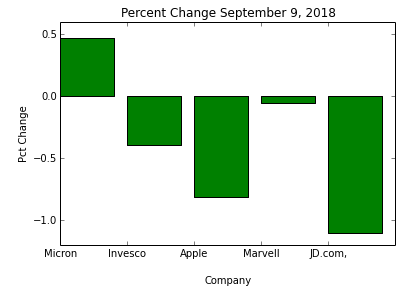

In [30]:
dateFormat=("Percent Change {0} {1}, {2}".format(now.strftime("%B"),now.day,now.year))
#plot for percent change in value
plt.bar(x_pos, yval, color='green')
plt.xticks(x_pos, x)
plt.xlabel("\nCompany")
plt.ylabel("\nPct Change")
plt.title(dateFormat)
plt.show()